In [1]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ndivhuwonyase/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from tqdm import tqdm
import os
import tensorflow as tf 
import re

In [3]:
df = pd.read_csv('sona.csv')

In [4]:
df.head()

,filename,speech,year,president_13,date
0,1994_post_elections_Mandela.txt,24 May 1994 Madame Speaker and Deputy Speaker...,1994,Mandela,24-05-1994
1,1994_pre_elections_deKlerk.txt,28 February 1994 Mr Speaker This Parliament ...,1994,deKlerk,28-02-1994
2,1995_Mandela.txt,17 February 1995 Honourable President and Dep...,1995,Mandela,17-02-1995
3,1996_Mandela.txt,9 February 1996 Honourable President and Depu...,1996,Mandela,9-02-1996
4,1997_Mandela.txt,7 February 1997 Madame Speaker and Deputy Spe...,1997,Mandela,7-02-1997


In [5]:
sentences = []
presidents = []

for index, row in df.iterrows():
    speech_sentences = sent_tokenize(row['speech'])
    sentences.extend(speech_sentences)
    presidents.extend([row['president_13']] * len(speech_sentences))

sentence_df = pd.DataFrame({
    'Sentence': sentences,
    'President': presidents
})

In [6]:
sentence_df

,Sentence,President
0,24 May 1994 Madame Speaker and Deputy Speaker...,Mandela
1,The time will come when our nation will honour...,Mandela
2,The certainties that come with age tell me tha...,Mandela
3,Her name is Ingrid Jonker.,Mandela
4,She was both a poet and a South African.,Mandela
...,...,...
9331,Let us forge a new consensus to confront a new...,Ramaphosa
9332,Let us get to work.,Ramaphosa
9333,Let us rebuild our country.,Ramaphosa
9334,And let us leave no one behind.,Ramaphosa


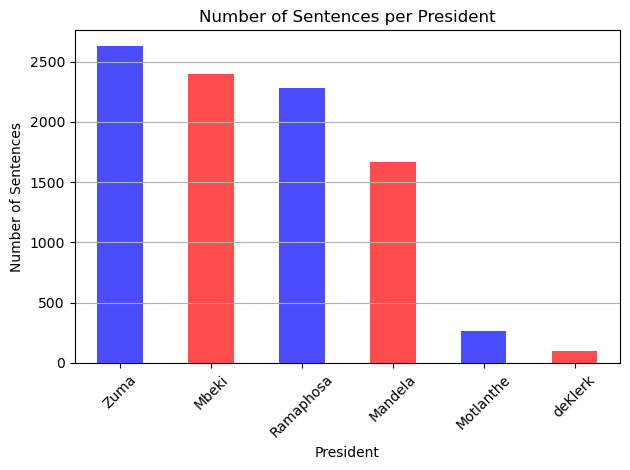

In [7]:
sentence_counts = sentence_df['President'].value_counts()

import matplotlib.pyplot as plt
# Plotting
sentence_counts.plot(kind='bar', color=['blue', 'red'], alpha=0.7)
plt.title('Number of Sentences per President')
plt.xlabel('President')
plt.ylabel('Number of Sentences')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()




In [8]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [9]:
import string 
sentence_df['sentence_clean'] = sentence_df['Sentence'].apply(clean_text)
sentence_df.head()

,Sentence,President,sentence_clean
0,24 May 1994 Madame Speaker and Deputy Speaker...,Mandela,may madame speaker and deputy speaker presi...
1,The time will come when our nation will honour...,Mandela,the time will come when our nation will honour...
2,The certainties that come with age tell me tha...,Mandela,the certainties that come with age tell me tha...
3,Her name is Ingrid Jonker.,Mandela,her name is ingrid jonker
4,She was both a poet and a South African.,Mandela,she was both a poet and a south african


In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
sentence_df['sentence_clean'] = sentence_df['sentence_clean'].apply(remove_stopwords)
sentence_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ndivhuwonyase/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Sentence,President,sentence_clean
0,24 May 1994 Madame Speaker and Deputy Speaker...,Mandela,may madame speaker deputy speaker president...
1,The time will come when our nation will honour...,Mandela,time come nation honour memory sons daughters ...
2,The certainties that come with age tell me tha...,Mandela,certainties come age tell among shall find afr...
3,Her name is Ingrid Jonker.,Mandela,name ingrid jonker
4,She was both a poet and a South African.,Mandela,poet south african


In [11]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

sentence_df['sentence_clean'] = sentence_df['sentence_clean'].apply(stemm_text)
sentence_df.head()

,Sentence,President,sentence_clean
0,24 May 1994 Madame Speaker and Deputy Speaker...,Mandela,may madam speaker deputi speaker presid sen...
1,The time will come when our nation will honour...,Mandela,time come nation honour memori son daughter mo...
2,The certainties that come with age tell me tha...,Mandela,certainti come age tell among shall find afrik...
3,Her name is Ingrid Jonker.,Mandela,name ingrid jonker
4,She was both a poet and a South African.,Mandela,poet south african


In [12]:
def preprocess_data(text):
    # Clean puntuation, urls, and so on
    text = clean_text(text)
    # Remove stopwords
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    # Stemm all the words in the sentence
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    
    return text
sentence_df['sentence_clean'] = sentence_df['sentence_clean'].apply(preprocess_data)
sentence_df.head()

,Sentence,President,sentence_clean
0,24 May 1994 Madame Speaker and Deputy Speaker...,Mandela,may madam speaker deputi speaker presid sen...
1,The time will come when our nation will honour...,Mandela,time come nation honour memori son daughter mo...
2,The certainties that come with age tell me tha...,Mandela,certainti come age tell among shall find afrik...
3,Her name is Ingrid Jonker.,Mandela,name ingrid jonker
4,She was both a poet and a South African.,Mandela,poet south african


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(sentence_df['President'])

sentence_df['target_encoded'] = le.transform(sentence_df['President'])
sentence_df.head()

,Sentence,President,sentence_clean,target_encoded
0,24 May 1994 Madame Speaker and Deputy Speaker...,Mandela,may madam speaker deputi speaker presid sen...,0
1,The time will come when our nation will honour...,Mandela,time come nation honour memori son daughter mo...,0
2,The certainties that come with age tell me tha...,Mandela,certainti come age tell among shall find afrik...,0
3,Her name is Ingrid Jonker.,Mandela,name ingrid jonker,0
4,She was both a poet and a South African.,Mandela,poet south african,0


In [14]:
x = sentence_df['sentence_clean']
y = sentence_df['target_encoded']

print(len(x), len(y))

9336 9336


In [15]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

7002 7002
2334 2334


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [17]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [18]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

x_train_tfidf

<7002x6895 sparse matrix of type '<class 'numpy.float64'>'
	with 87477 stored elements in Compressed Sparse Row format>

In [20]:
texts = sentence_df['sentence_clean']
target = sentence_df['target_encoded']

In [21]:
# Calculate the length of our vocabulary
from keras.preprocessing.text import Tokenizer
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

7749

In [22]:
from keras.preprocessing.sequence import pad_sequences
tf.keras.preprocessing.sequence.pad_sequences(
    sequences, maxlen=None, dtype='int32', padding='pre',
    truncating='pre', value=0.0
)

NameError: name 'sequences' is not defined

In [23]:
from nltk.tokenize import word_tokenize
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(texts), 
    length_long_sentence, 
    padding='post'
)

train_padded_sentences

array([[ 235,  240,   83, ...,    0,    0,    0],
       [  42,  177,    3, ...,    0,    0,    0],
       [1056,  177,  508, ...,    0,    0,    0],
       ...,
       [ 204,   15,  991, ...,    0,    0,    0],
       [ 204,   15, 1498, ...,    0,    0,    0],
       [ 264,    0,    0, ...,    0,    0,    0]], dtype=int32)

In [24]:
# Create a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Train the model
nb.fit(x_train_dtm, y_train)

MultinomialNB()

In [25]:
# Make class and probability predictions
y_pred_class = nb.predict(x_test_dtm)
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]

In [26]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

confusion=metrics.confusion_matrix(y_test, y_pred_class)

0.5814053127677806


[0 4 1 ... 1 1 4]


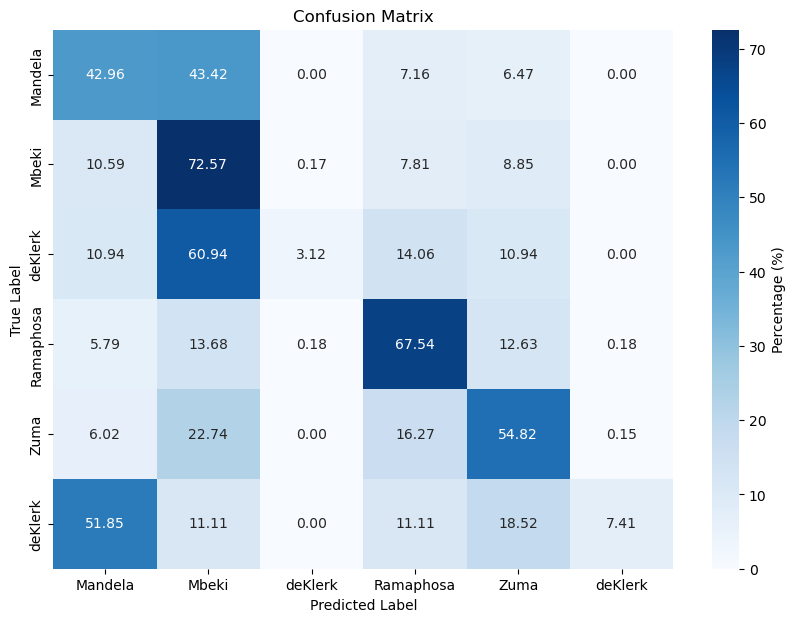

In [27]:
print(y_pred_class)
import seaborn as sns
import numpy as np

labels = ['Mandela', 'Mbeki', 'deKlerk', 'Ramaphosa', 'Zuma', 'deKlerk']
row_sums = confusion.sum(axis=1)
normalized_confusion = confusion / row_sums[:, np.newaxis] * 100
plt.figure(figsize=(10, 7))
sns.heatmap(normalized_confusion, annot=True,  fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar_kws={'label': 'Percentage (%)'})
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [28]:
import xgboost as xgb
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])

0.5467009425878321


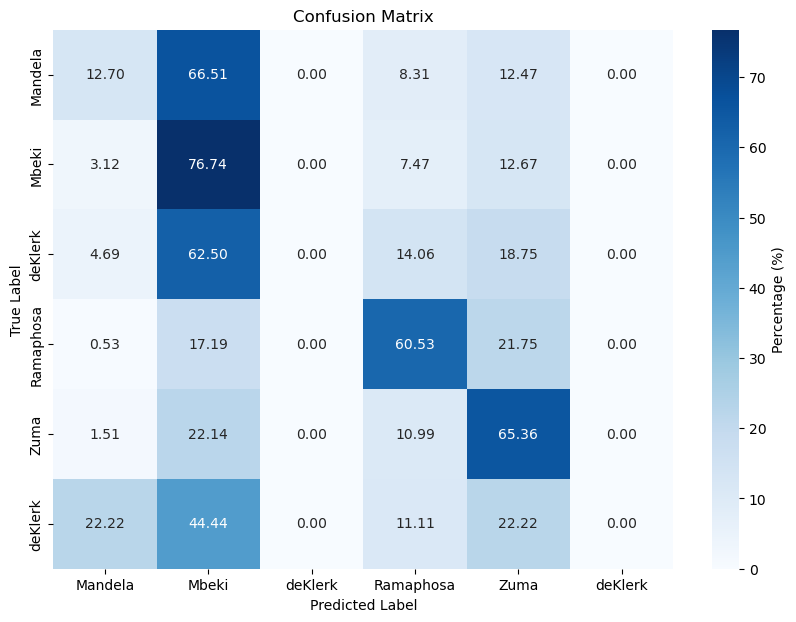

In [29]:
# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_class))


confusion=metrics.confusion_matrix(y_test, y_pred_class)
row_sums = confusion.sum(axis=1)
normalized_confusion = confusion / row_sums[:, np.newaxis] * 100
plt.figure(figsize=(10, 7))
sns.heatmap(normalized_confusion, annot=True,  fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar_kws={'label': 'Percentage (%)'})
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [30]:
pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc',
        # colsample_bytree=0.8,
        # subsample=0.7,
        # min_child_weight=5,
    ))
])

/Users/ndivhuwonyase/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Train: 0.7176520994001714
Test: 0.5


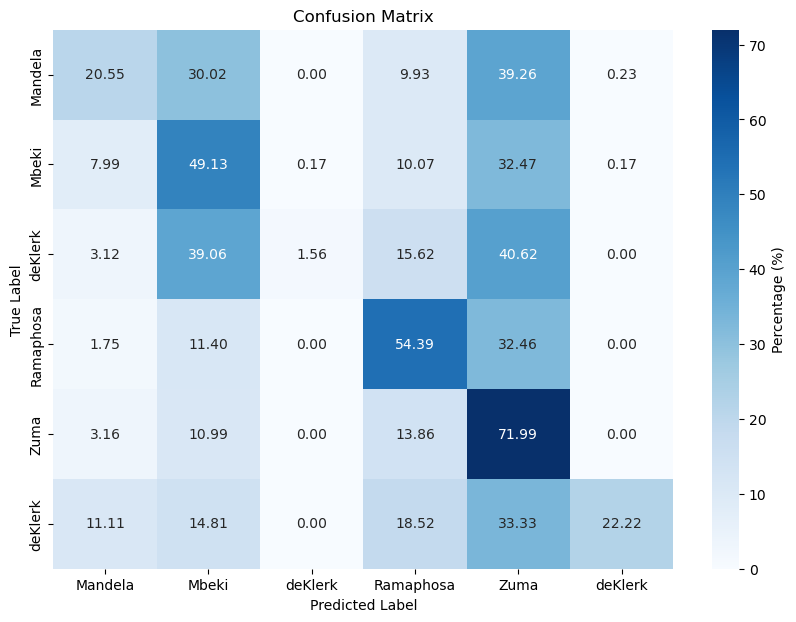

In [32]:
# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

print('Train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Test: {}'.format(metrics.accuracy_score(y_test, y_pred_class)))

confusion=metrics.confusion_matrix(y_test, y_pred_class)
row_sums = confusion.sum(axis=1)
normalized_confusion = confusion / row_sums[:, np.newaxis] * 100
plt.figure(figsize=(10, 7))
sns.heatmap(normalized_confusion, annot=True,  fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar_kws={'label': 'Percentage (%)'})
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [33]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

import transformers
from tqdm.notebook import tqdm
from tokenizers import BertWordPieceTokenizer

In [34]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')

def bert_encode(data, maximum_length) :
    input_ids = []
    attention_masks = []

    for text in data:
        encoded = tokenizer.encode_plus(
            text, 
            add_special_tokens=True,
            max_length=maximum_length,
            pad_to_max_length=True,

            return_attention_mask=True,
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
        
    return np.array(input_ids),np.array(attention_masks)

In [35]:
texts = sentence_df['sentence_clean']
target = sentence_df['target_encoded']

train_input_ids, train_attention_masks = bert_encode(texts,60)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/Users/ndivhuwonyase/anaconda3/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2632: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [36]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

def create_model(bert_model):
    
    input_ids = tf.keras.Input(shape=(60,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(60,),dtype='int32')

    output = bert_model([input_ids,attention_masks])
    output = output[1]
    output = tf.keras.layers.Dense(32,activation='relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(1,activation='sigmoid')(output)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# install transformers
!pip install git+https://github.com/huggingface/transformers

In [ ]:
!pip install --upgrade transformers

In [37]:
from transformers import BertModel, BertForMaskedLM

In [38]:
from transformers import TFBertModel
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [39]:
model = create_model(bert_model)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 60)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 60)]                 0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_1[0][0]',             
 )                           ngAndCrossAttentions(last_   40         'input_2[0][0]']             
                             hidden_state=(None, 60, 76                                           
                             8),                                                              

In [ ]:
history = model.fit(
    [train_input_ids, train_attention_masks],
    target,
    validation_split=0.2, 
    epochs=3,
    batch_size=10
)

Epoch 1/3
301/747 [===========>..................] - ETA: 17:17 - loss: -788.2031 - accuracy: 0.3196